# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this exercise are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [2]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2023-11-14 21:12:34--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   323MB/s    in 0.2s    

2023-11-14 21:12:35 (323 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 2 repl repl 6.0K Nov 14 21:12 .
drwxr-xr-x 4 repl repl 6.0K Nov 14 17:19 ..
-rw-r--r-- 1 repl repl  63M Nov 14 21:12 movie_data.csv
-rw-r--r-- 1 repl repl  429 Nov 14 17:19 notebook.ipynb
-rw-r--r-- 1 repl repl  38K Nov 14 21:12 Turki_of_Blanks_Understanding_the_Customer’s_Feedback.ipynb


###Reading the dataset file and getting info on it
**Question 1:** Use pandas to read the csv file and display the first 5 rows

In [3]:
# path to IMDB dataseet
dataset_path = 'movie_data.csv'

# read file (dataset) into our program using pandas
data = pd.read_csv('movie_data.csv')

# display first 5 rows
data.head(5)

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Getting info on our dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

**Question 2:** Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

In [5]:
data['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<AxesSubplot: >

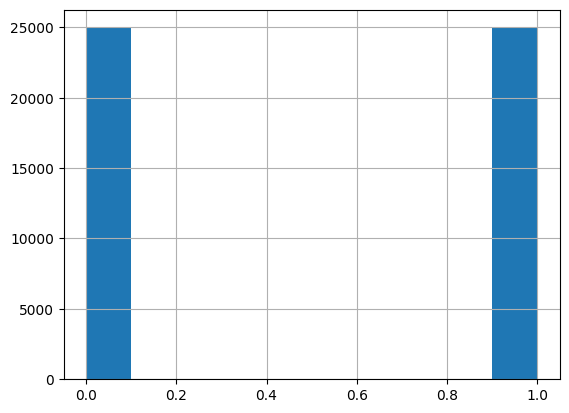

In [6]:
data['sentiment'].hist()

## Text cleaning

In [7]:
print(data.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

**Question 3:** Let's define a function that would clean each movie review (sentence)

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# define cleaning function
def clean_review(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens]
    text = ' '.join(stemmed)
    text = ' '.join([word for word in text.split() if word not in english_stopwords])
    return text

**Question 4 :** Try it out on an instance of the dataset then on the entire dataset.

In [9]:
from colorama import Fore

instance = data.iloc[0]
review = instance['review']
cleaned_review = clean_review(review)

print(Fore.RED + 'Original review:', end=' ')
print(Fore.RESET + review)
print(Fore.GREEN + 'Cleaned review:', end=' ')
print(Fore.RESET + cleaned_review)

Original review: I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.
Cleaned review: went saw thi movi last night coax friend mine admit wa reluct see becaus knew ashton kutcher wa onli abl comedi wa wrong kutcher play charact jake fischer veri well kevin c

And now clean the entire dataset reviews

In [10]:
# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,went saw thi movi last night coax friend mine ...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow hi prom...
2,As a recreational golfer with some knowledge o...,1,recreat golfer knowledg sport histori wa pleas...
3,"I saw this film in a sneak preview, and it is ...",1,saw thi film sneak preview delight cinematogra...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton ha taken true stori us golf open m...


## Split dataset for training and testing
We will split our data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

**Question 5:** Split your data to get x_train, x_test, y_train and y_test.

In [11]:
from sklearn.model_selection import train_test_split

X = data['clean_review']
y = data['sentiment']

# Split data into 50% training & 50% test
# Use a random state of 42 for example to ensure having the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## Feature extraction with Bag of Words


**Question 6:**  In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary=True, max_features=10000)

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(X_train)

# transform x_train to bag of words
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


## Classification

**Question 7:** Your data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [13]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(X_train_bow, y_train)

# get the mean accuracy on the training data
acc_train = model.score(X_train_bow, y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.98124


In [14]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier (I will use a higher value for the C parameter for optimization)
model = LogisticRegression(C=1)  # Adjust the value of C as needed

# Retrain the classifier on the training data with the updated model
model.fit(X_train_bow, y_train)

# Get the mean accuracy on the updated model with the test data
acc_test_updated = model.score(X_test_bow, y_test)

print('Updated Test Accuracy:', acc_test_updated)

# Further optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_bow, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
model_optimized = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])

# Retrain the classifier on the training data with the optimized model
model_optimized.fit(X_train_bow, y_train)

# Get the mean accuracy on the optimized model with the test data
acc_test_optimized = model_optimized.score(X_test_bow, y_test)

print('Optimized Test Accuracy:', acc_test_optimized)


# get the mean accuracy on the training data
acc_train = model.score(X_train_bow, y_train)

print('Training Accuracy:', acc_train)

Updated Test Accuracy: 0.86608
Optimized Test Accuracy: 0.87884
Training Accuracy: 0.98124


In [15]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)


# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# summarize the model
model.summary()

# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy * 100))

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              120       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


2023-11-14 21:17:26.317635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Accuracy: 89.999998


In [16]:
#trying other feature extraction methods TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Learn the vocabulary of all tokens in our training dataset
tfidf_vectorizer.fit(X_train)

# Transform x_train to TF-IDF features
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Retrain the classifier on the training data with the TF-IDF features
model_optimized.fit(X_train_tfidf, y_train)

# Get the mean accuracy on the optimized model with the test data using TF-IDF features
acc_test_tfidf = model_optimized.score(X_test_tfidf, y_test)

print('Test Accuracy with TF-IDF:', acc_test_tfidf)

Test Accuracy with TF-IDF: 0.86424


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your tokenizer (with num_words=10000)
tokenizer_obj = Tokenizer(num_words=10000, oov_token="<OOV>")

# Assign an index (number) to each word using the fit_on_texts function
tokenizer_obj.fit_on_texts(data['clean_review'])

# Transform text to a sequence of integers
X_tokens = tokenizer_obj.texts_to_sequences(data['clean_review'])

# Apply post-padding to the sequences
X_pad = pad_sequences(X_tokens, maxlen=max_length, padding='post')

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 300

# Build the neural network
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model: assign loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()

# Train the model
model.fit(X_pad, data['sentiment'], batch_size=32, epochs=5, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 300)            3000000   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,219,777
Trainable params: 3,219,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5659 - accuracy: 0.7053 - val_loss: 0.8666 - val_accuracy: 0.4306
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.4913 - accuracy: 0.7607 - val_loss: 0.8492 - val_accuracy: 0.5066
Epoch 3/5
1250/125

In [19]:
# Train the model
model.fit(X_pad, data['sentiment'], batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2798 - accuracy: 0.8711 - val_loss: 1.3705 - val_accuracy: 0.5039
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2410 - accuracy: 0.8894 - val_loss: 1.4095 - val_accuracy: 0.5447
Epoch 3/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2087 - accuracy: 0.9067 - val_loss: 1.8717 - val_accuracy: 0.5223
Epoch 4/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1793 - accuracy: 0.9202 - val_loss: 1.9656 - val_accuracy: 0.5410
Epoch 5/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1535 - accuracy: 0.9324 - val_loss: 2.1892 - val_accuracy: 0.5338


In [20]:
# Evaluate model with test data
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

# Get the mean accuracy on the test data
acc_test = model.evaluate(X_test_pad, y_test)[1]

acc_test

782/782 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.8692


0.8692399859428406

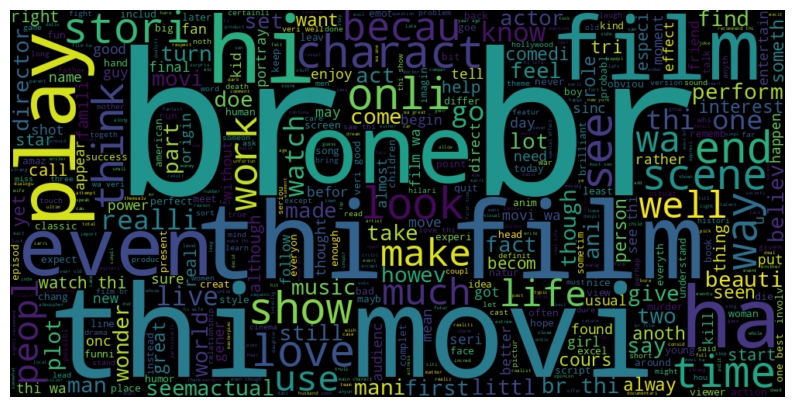

In [21]:
#word cloud for positive review words
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text for the word cloud
positive_text = " ".join(data[data['sentiment'] == 1]['clean_review'])

# Create the word cloud
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=4)
positive_words = WC.generate(positive_text)

# Display the word cloud
plt.imshow(positive_words, interpolation='bilinear')
plt.axis('off')
plt.show()

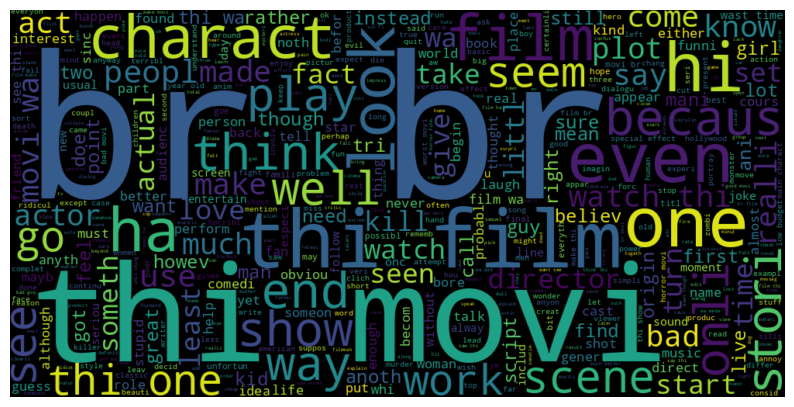

In [22]:
#Word cloud for negative review words
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text for the word cloud
negative_text = " ".join(data[data['sentiment'] == 0]['clean_review'])

# Create the word cloud
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=4)
negative_words = WC.generate(negative_text)

# Display the word cloud
plt.imshow(negative_words, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Distil BERT Embeddings
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine

def transformer_embedding(name, inp, model_name):
    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

z = ["input1", "input2"]  # Define the list 'z' with input values
embedding_features1 = transformer_embedding('distilbert-base-uncased', z[0], TFDistilBertModel)
embedding_features2 = transformer_embedding('distilbert-base-uncased', z[1], TFDistilBertModel)
distance = 1 - cosine(embedding_features1[0], embedding_features2[0])
distance

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-base-uncased were no

0.9869622026387977

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.
All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


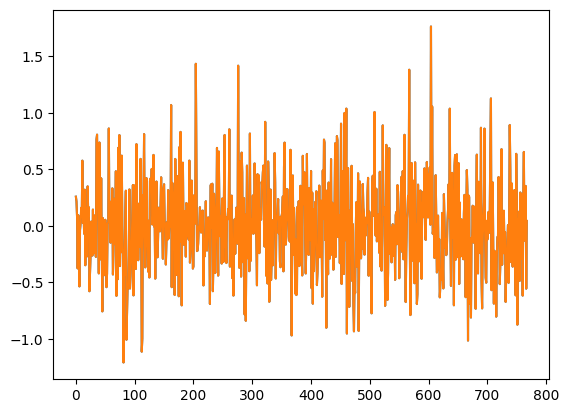

In [27]:
# GPT embeddings
from transformers import AutoTokenizer, pipeline, TFOpenAIGPTModel
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

def transformer_gpt_embedding(name, inp, model_name):
    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

z = ["input_text_1", "input_text_2"]  # Replace with your input texts

gpt_features1 = transformer_gpt_embedding('openai-gpt', z[0], TFOpenAIGPTModel)
gpt_features2 = transformer_gpt_embedding('openai-gpt', z[1], TFOpenAIGPTModel)

distance = 1 - cosine(gpt_features1[0], gpt_features2[0])

plt.plot(gpt_features1[0])
plt.plot(gpt_features2[0])
plt.show()

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


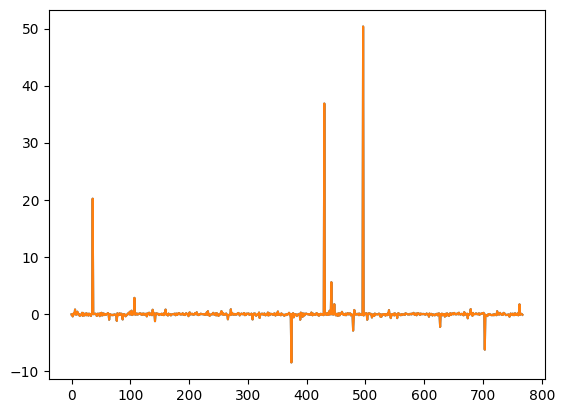

In [28]:
# GPT-2
from transformers import AutoTokenizer, pipeline, TFGPT2Model

gpt2_features1 = transformer_gpt_embedding('gpt2', z[0], TFGPT2Model)
gpt2_features2 = transformer_gpt_embedding('gpt2', z[1], TFGPT2Model)
distance = 1 - cosine(gpt2_features1[0], gpt2_features2[0])

plt.plot(gpt2_features1[0])
plt.plot(gpt2_features2[0])
plt.show()

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.
Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_

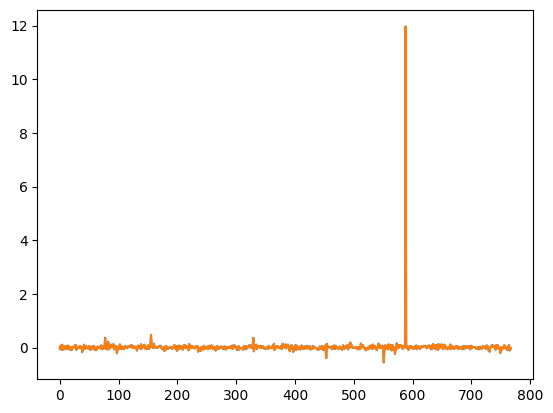

In [29]:
# Longformer
from transformers import AutoTokenizer, pipeline, TFLongformerModel

longformer_features1 = transformer_gpt_embedding('allenai/longformer-base-4096', z[0], TFLongformerModel)
longformer_features2 = transformer_gpt_embedding('allenai/longformer-base-4096', z[1], TFLongformerModel)

distance = 1 - cosine(longformer_features1[0], longformer_features2[0])

plt.plot(longformer_features1[0])
plt.plot(longformer_features2[0])
plt.show()